In [58]:
# import tool set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:
# Get data from Excel
df = pd.read_excel('/Users/arnet/Desktop/Ironhack/Week5_Project/regression_data.xls')

In [60]:
#df

In [61]:
# Export as csv
#df.to_csv('/Users/arnet/Desktop/Ironhack/Week5_Project/regression_data_new.csv')

In [62]:
# Get information about the columns
#df.info()

#### What data should be dropped before normalisation and regression?

Columns:
* ID
* date
* lat
* long
* waterfront

In [63]:
# Get an overview of column values
'''for column in df:
    print(column.upper())
    print(df[column].value_counts())
    print()'''

'for column in df:\n    print(column.upper())\n    print(df[column].value_counts())\n    print()'

## Identify outliers

By plotting the coordinates of the properties on a map (via Tableau), it was discovered that a number of properties lie hundreds of kilometers away from the area in which the vast majority of the data is concentrated. It was also discovered that approx. 120 properties are located on an island only accessible by ferry. Since the setting of these properties is markedly different from the others in the data set, it was decided to exclude these properties by excluding Zip Codes 98070 ( Vashon and Maury Island), 98045 and 98065 as well as properties located East of -121.7 degrees longitude

In [64]:
# Drop properties on islands and far outside central dataset
zips = [98070, 98045, 98065]
for code in zips:
    df.drop(df[df.zipcode == code].index, inplace=True)

df.drop(df[df.long > -121.7].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [65]:
# Drop property with 33 bedrooms
df.drop(df[df.bedrooms == 33].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [66]:
# Drop lot sizes with >250,000 square feet
df.drop(df[df.sqft_lot15 > 200000].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

## Add other datasets / calculated fields

#### Calculated fields
* Bins concerning housing prices
* Distance from downtown Seattle
* Distance from Metro Station
* Distance from top 5 employers

In [67]:
# Create column with YEAR BUILT categories
# create a list of our conditions
'''conditions = [
    (df['yr_built'] <= 1940),
    (df['yr_built'] > 1940) & (df['yr_built'] <=1980),
    (df['yr_built'] > 1980) & (df['yr_built'] <= 2000),
    (df['yr_built'] > 2000) & (df['yr_built'] <= 2010),
    (df['yr_built'] > 2010)
    ]

# create a list of the values we want to assign for each condition
values = ['pre_war', 'post_war','post_80','post_2000', 'new']

# create a new column and use np.select to assign values to it using our lists as arguments
df['yr_built_bin'] = np.select(conditions, values)

# display updated DataFrame
#df.head()'''

"conditions = [\n    (df['yr_built'] <= 1940),\n    (df['yr_built'] > 1940) & (df['yr_built'] <=1980),\n    (df['yr_built'] > 1980) & (df['yr_built'] <= 2000),\n    (df['yr_built'] > 2000) & (df['yr_built'] <= 2010),\n    (df['yr_built'] > 2010)\n    ]\n\n# create a list of the values we want to assign for each condition\nvalues = ['pre_war', 'post_war','post_80','post_2000', 'new']\n\n# create a new column and use np.select to assign values to it using our lists as arguments\ndf['yr_built_bin'] = np.select(conditions, values)\n\n# display updated DataFrame\n#df.head()"

In [68]:
# Create column with RENOVATION categories
# create a list of our conditions
conditions = [
    (df['yr_renovated'] <= 1970),
    (df['yr_renovated'] > 1970) & (df['yr_renovated'] <=2000),
    (df['yr_renovated'] > 2000) & (df['yr_renovated'] <= 2010),
    (df['yr_renovated'] > 2010)
    ]

# create a list of the values we want to assign for each condition
values = ['not relevant', 'distant', 'recent', 'very recent']

# create a new column and use np.select to assign values to it using our lists as arguments
df['renovation_cat'] = np.select(conditions, values)

# display updated DataFrame
#df.head()

In [69]:
# Create column with BASEMENT categories
# create a list of our conditions
conditions = [
    (df['sqft_basement'] <= 50),
    (df['sqft_basement'] > 50) & (df['sqft_basement'] <=300),
    (df['sqft_basement'] > 300) & (df['sqft_basement'] <= 700),
    (df['sqft_basement'] > 700)
    ]

# create a list of the values we want to assign for each condition
values = ['none', 'small', 'medium', 'large']

# create a new column and use np.select to assign values to it using our lists as arguments
df['basement_size'] = np.select(conditions, values)

# display updated DataFrame
#df.head()

### Create clusters based on geospatial data

C:\Users\arnet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='long', ylabel='lat'>

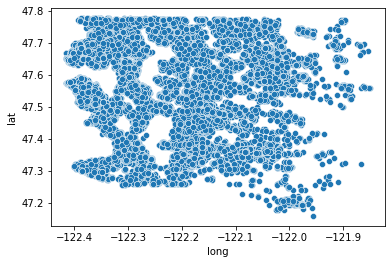

In [70]:
#plt.figure(figsize = (15,8))
sns.scatterplot(df['long'], df['lat'])

In [71]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# creates 20 clusters using hierarchical clustering.
#agc = AgglomerativeClustering(n_clusters =20, affinity='euclidean', linkage='ward')
#df['pickup_cluster_ag'] = agc.fit_predict(df[['lat','long']])

# creates clusters using k-means clustering algorithm.
kmeans = KMeans(300)
clusters = kmeans.fit_predict(df[['lat','long']])
df['geo_cluster_k'] = kmeans.predict(df[['lat','long']])

In [72]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovation_cat,basement_size,geo_cluster_k
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,221900,not relevant,none,70
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,538000,distant,medium,55
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,180000,not relevant,none,273
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,604000,not relevant,large,256
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,510000,not relevant,none,161


In [73]:
#plt.figure(figsize = (15,8))
#sns.scatterplot(df['long'], df['lat'], df['pickup_cluster_ag'])

C:\Users\arnet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='long', ylabel='lat'>

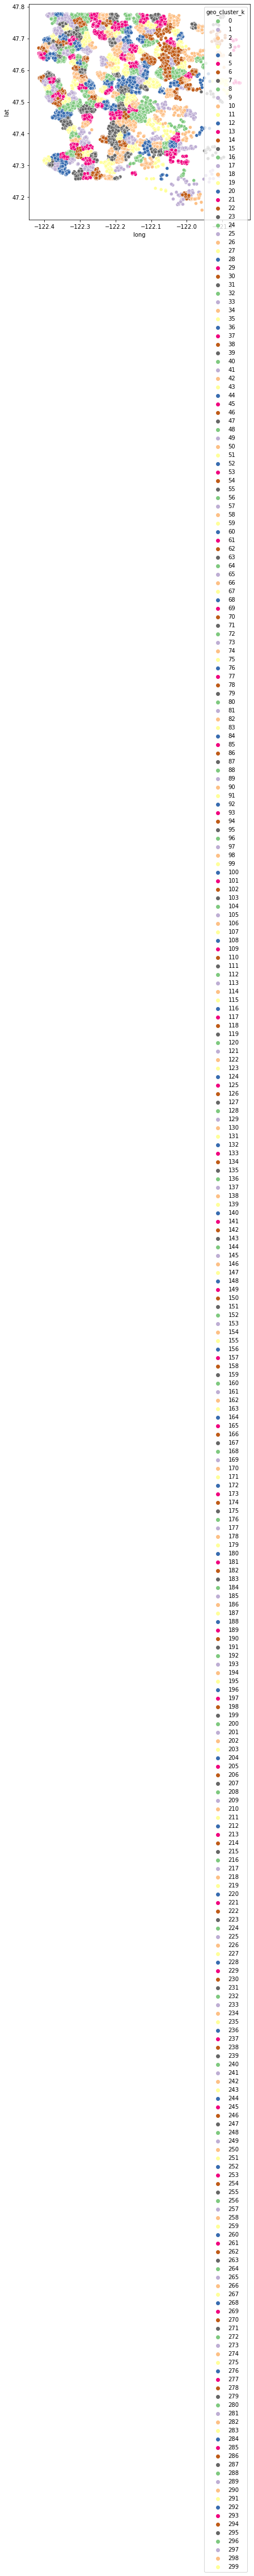

In [74]:
plt.figure(figsize = (7,7))
sns.scatterplot(df['long'], df['lat'], df['geo_cluster_k'], palette='Accent')

### Calculate avg. square foot price per cluster

### Get address components

In [47]:
from geopy.geocoders import Nominatim

# create the locator
geolocator = Nominatim(user_agent="myGeocoder")

# getting the location address
location = geolocator.reverse("47.5112, -122.257")
print(location)
# >>> result : Backwerk, Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland

# getting address compontent like street, city, state, country, country code, postalcode and so on.
print(location.raw.get('address').get('state'))
print(location.raw.get('address').get('city_district'))
print(location.raw.get('address').get('country'))
print(location.raw.get('address').get('postcode'))
print(location.raw.get('address').get('road'))
print(location.raw.get('address').get('house_number'))

10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States
Washington
None
United States
98178
61st Avenue South
10012


In [48]:
df_addr = df[:10]

In [49]:
import plotly_express as px
px.scatter_mapbox(df_addr, lat='lat', lon='long', zoom=15)

In [50]:
df_addr['coords'] = df_addr['lat'].map(str) +',' + df_addr['long'].map(str)
df_addr

<ipython-input-50-97c50bdc94e6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovation_cat,basement_size,coords
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,221900,not relevant,none,"47.5112,-122.257"
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,538000,distant,medium,"47.721,-122.319"
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,180000,not relevant,none,"47.7379,-122.233"
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,604000,not relevant,large,"47.5208,-122.393"
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,510000,not relevant,none,"47.6168,-122.045"
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,0,98053,47.6561,-122.005,4760,101930,1230000,not relevant,large,"47.6561,-122.005"
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,...,0,98003,47.3097,-122.327,2238,6819,257500,not relevant,none,"47.3097,-122.327"
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,...,0,98198,47.4095,-122.315,1650,9711,291850,not relevant,none,"47.4095,-122.315"
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,...,0,98146,47.5123,-122.337,1780,8113,229500,not relevant,large,"47.5123,-122.337"
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,...,0,98038,47.3684,-122.031,2390,7570,323000,not relevant,none,"47.3684,-122.031"


In [51]:
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [52]:
#Optional - import progress bar
# import tqdm
# from tqdm._tqdm_notebook import tqdm_notebook

In [53]:
df_addr['address'] = df_addr['coords'].apply(rgeocode)
df_addr.head(10)

<ipython-input-53-e5f5018b95e8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovation_cat,basement_size,coords,address
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,221900,not relevant,none,"47.5112,-122.257","(10012, 61st Avenue South, Rainier Beach, Seat..."
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,538000,distant,medium,"47.721,-122.319","(837, Northeast 127th Street, Northgate, Seatt..."
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,180000,not relevant,none,"47.7379,-122.233","(15109, 81st Avenue Northeast, Moorlands, Kenm..."
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,604000,not relevant,large,"47.5208,-122.393","(9236, Fauntleroy Way Southwest, Fauntleroy, S..."
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,510000,not relevant,none,"47.6168,-122.045","(923, 221st Avenue Northeast, Sammamish, King ..."
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,98053,47.6561,-122.005,4760,101930,1230000,not relevant,large,"47.6561,-122.005","(25005, Northeast Patterson Way, Union Hill-No..."
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,...,98003,47.3097,-122.327,2238,6819,257500,not relevant,none,"47.3097,-122.327","(533, South 330th Place, Federal Way, King Cou..."
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,...,98198,47.4095,-122.315,1650,9711,291850,not relevant,none,"47.4095,-122.315","(21421, 14th Avenue South, Des Moines Creek, D..."
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,...,98146,47.5123,-122.337,1780,8113,229500,not relevant,large,"47.5123,-122.337","(216, Southwest 102nd Street, White Center, Se..."
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,...,98038,47.3684,-122.031,2390,7570,323000,not relevant,none,"47.3684,-122.031","(26007, 232nd Place Southeast, Katesridge, Dan..."


In [54]:
df_addr['house_number'], df_addr['coords'] = zip(*df_addr.address)

<ipython-input-54-ee3cd467e956>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df_addr

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,price,renovation_cat,basement_size,coords,address,house_number
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,221900,not relevant,none,"(47.5112302, -122.25676111324441)","(10012, 61st Avenue South, Rainier Beach, Seat...","10012, 61st Avenue South, Rainier Beach, Seatt..."
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,538000,distant,medium,"(47.72106685, -122.31909342613385)","(837, Northeast 127th Street, Northgate, Seatt...","837, Northeast 127th Street, Northgate, Seattl..."
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,180000,not relevant,none,"(47.7379266, -122.233196)","(15109, 81st Avenue Northeast, Moorlands, Kenm...","15109, 81st Avenue Northeast, Moorlands, Kenmo..."
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,604000,not relevant,large,"(47.5208273, -122.39317386448599)","(9236, Fauntleroy Way Southwest, Fauntleroy, S...","9236, Fauntleroy Way Southwest, Fauntleroy, Se..."
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,510000,not relevant,none,"(47.61698732325433, -122.04485525389615)","(923, 221st Avenue Northeast, Sammamish, King ...","923, 221st Avenue Northeast, Sammamish, King C..."
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,47.6561,-122.005,4760,101930,1230000,not relevant,large,"(47.65612925, -122.00532886715584)","(25005, Northeast Patterson Way, Union Hill-No...","25005, Northeast Patterson Way, Union Hill-Nov..."
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,...,47.3097,-122.327,2238,6819,257500,not relevant,none,"(47.309697549999996, -122.32710884347944)","(533, South 330th Place, Federal Way, King Cou...","533, South 330th Place, Federal Way, King Coun..."
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,...,47.4095,-122.315,1650,9711,291850,not relevant,none,"(47.409549549999994, -122.31512848774693)","(21421, 14th Avenue South, Des Moines Creek, D...","21421, 14th Avenue South, Des Moines Creek, De..."
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,...,47.5123,-122.337,1780,8113,229500,not relevant,large,"(47.5122979, -122.3371822494673)","(216, Southwest 102nd Street, White Center, Se...","216, Southwest 102nd Street, White Center, Sea..."
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,...,47.3684,-122.031,2390,7570,323000,not relevant,none,"(47.3684071, -122.0308673)","(26007, 232nd Place Southeast, Katesridge, Dan...","26007, 232nd Place Southeast, Katesridge, Danv..."


In [56]:
df_ad = df_addr['house_number'].str.split(',', expand=True)
df_addresses = pd.concat((df_addr, df_ad), axis=1)
df_addresses

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,house_number,0,1,2,3,4,5,6,7,8
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,"10012, 61st Avenue South, Rainier Beach, Seatt...",10012,61st Avenue South,Rainier Beach,Seattle,King County,Washington,98178,United States,None
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,"837, Northeast 127th Street, Northgate, Seattl...",837,Northeast 127th Street,Northgate,Seattle,King County,Washington,98125,United States,None
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,"15109, 81st Avenue Northeast, Moorlands, Kenmo...",15109,81st Avenue Northeast,Moorlands,Kenmore,King County,Washington,98028,United States,None
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,"9236, Fauntleroy Way Southwest, Fauntleroy, Se...",9236,Fauntleroy Way Southwest,Fauntleroy,Seattle,King County,Washington,98136,United States,None
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,"923, 221st Avenue Northeast, Sammamish, King C...",923,221st Avenue Northeast,Sammamish,King County,Washington,98074,United States,None,None
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,"25005, Northeast Patterson Way, Union Hill-Nov...",25005,Northeast Patterson Way,Union Hill-Novelty Hill,King County,Washington,98053,United States,None,None
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,...,"533, South 330th Place, Federal Way, King Coun...",533,South 330th Place,Federal Way,King County,Washington,98003,United States,None,None
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,...,"21421, 14th Avenue South, Des Moines Creek, De...",21421,14th Avenue South,Des Moines Creek,Des Moines,King County,Washington,98198,United States,None
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,...,"216, Southwest 102nd Street, White Center, Sea...",216,Southwest 102nd Street,White Center,Seattle,King County,Washington,98146,United States,None
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,...,"26007, 232nd Place Southeast, Katesridge, Danv...",26007,232nd Place Southeast,Katesridge,Danville,Maple Valley,King County,Washington,98038,United States


In [57]:
df_rev = df_addresses.drop([3, 4, 5, 6, 7, 8, 'coords', 'address', 'house_number'], axis= 1)
df_rev2 = df_rev.rename(columns={0: 'house_number', 1: 'road', 2: 'town'})
df_rev2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,price,renovation_cat,basement_size,house_number,road,town
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,221900,not relevant,none,10012,61st Avenue South,Rainier Beach
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,538000,distant,medium,837,Northeast 127th Street,Northgate
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,180000,not relevant,none,15109,81st Avenue Northeast,Moorlands
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,604000,not relevant,large,9236,Fauntleroy Way Southwest,Fauntleroy
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,510000,not relevant,none,923,221st Avenue Northeast,Sammamish
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,47.6561,-122.005,4760,101930,1230000,not relevant,large,25005,Northeast Patterson Way,Union Hill-Novelty Hill
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,...,47.3097,-122.327,2238,6819,257500,not relevant,none,533,South 330th Place,Federal Way
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,...,47.4095,-122.315,1650,9711,291850,not relevant,none,21421,14th Avenue South,Des Moines Creek
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,...,47.5123,-122.337,1780,8113,229500,not relevant,large,216,Southwest 102nd Street,White Center
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,...,47.3684,-122.031,2390,7570,323000,not relevant,none,26007,232nd Place Southeast,Katesridge


## Split columns into numerical and categorical values

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20789 entries, 0 to 20788
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20789 non-null  int64         
 1   date            20789 non-null  datetime64[ns]
 2   bedrooms        20789 non-null  int64         
 3   bathrooms       20789 non-null  float64       
 4   sqft_living     20789 non-null  int64         
 5   sqft_lot        20789 non-null  int64         
 6   floors          20789 non-null  float64       
 7   waterfront      20789 non-null  int64         
 8   view            20789 non-null  int64         
 9   condition       20789 non-null  int64         
 10  grade           20789 non-null  int64         
 11  sqft_above      20789 non-null  int64         
 12  sqft_basement   20789 non-null  int64         
 13  yr_built        20789 non-null  int64         
 14  yr_renovated    20789 non-null  int64         
 15  zi

### Drop columns which are not used for regression

In [561]:
df_waterfront = df['waterfront']
df_trimmed = df.drop(['id', 'date', 'lat', 'long', 'waterfront', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_renovated', 'zipcode'], axis= 1)

In [562]:
df_trimmed.head()

,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,price,renovation_cat,basement_size,geo_cluster_k
0,3,1.00,1.0,0,3,7,1180,1955,1340,5650,221900,not relevant,none,195
1,3,2.25,2.0,0,3,7,2170,1951,1690,7639,538000,distant,medium,71
2,2,1.00,1.0,0,3,6,770,1933,2720,8062,180000,not relevant,none,234
3,4,3.00,1.0,0,5,7,1050,1965,1360,5000,604000,not relevant,large,255
4,3,2.00,1.0,0,3,8,1680,1987,1800,7503,510000,not relevant,none,204


### Determine categorical data
Based on research, ordinal data such as condition, grade and view can be treated either as numerical or as categorical data. In order to find the best model to predict housing prices, we will test both.

In Model 1, categorical data will only include zipcode. 
In Model 2, categorical data will include view, condition, grade and zipcode.

Note: Ordinal data are discrete integers that can be ranked or sorted. A defining characteristic is that the distance between any two numbers is not known. (Source: https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689)

Results of Test:
Model 2 proved to be more effective, therefore it was decided to continue with Model 2.

#### Model 2

In [563]:
# Convert columns with ordinal / categorical data to object type
df_new = df_trimmed.copy()
columns = ['view', 'condition', 'grade', 'geo_cluster_k']
for column in columns:
    df_new[column] = df_new[column].astype('object')
    
# NO MORE COLUMNS OR ROWS WILL BE DROPPED FROM THIS POINT ON

In [564]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20789 entries, 0 to 20788
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        20789 non-null  int64  
 1   bathrooms       20789 non-null  float64
 2   floors          20789 non-null  float64
 3   view            20789 non-null  object 
 4   condition       20789 non-null  object 
 5   grade           20789 non-null  object 
 6   sqft_above      20789 non-null  int64  
 7   yr_built        20789 non-null  int64  
 8   sqft_living15   20789 non-null  int64  
 9   sqft_lot15      20789 non-null  int64  
 10  price           20789 non-null  int64  
 11  renovation_cat  20789 non-null  object 
 12  basement_size   20789 non-null  object 
 13  geo_cluster_k   20789 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.2+ MB


In [565]:
cat = df_new.select_dtypes(include = 'object')
cat

,view,condition,grade,renovation_cat,basement_size,geo_cluster_k
0,0,3,7,not relevant,none,195
1,0,3,7,distant,medium,71
2,0,3,6,not relevant,none,234
3,0,5,7,not relevant,large,255
4,0,3,8,not relevant,none,204
...,...,...,...,...,...,...
20784,0,3,8,not relevant,none,88
20785,0,3,8,not relevant,none,37
20786,0,3,7,not relevant,none,100
20787,0,3,8,not relevant,none,153


In [566]:
# Convert to binary
categorical = pd.get_dummies(cat, 
               drop_first = True)

## Numerical data

### Correlations check

In [567]:
# Plot regular df corrlations matrix
'''corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix, 
            cmap='seismic_r', #add '_r' at the end to reverse color scheme
            center = 0,
            annot= True) '''

"corr_matrix = df.corr()\nfig, ax = plt.subplots(figsize= (20, 20))\nsns.heatmap(corr_matrix, \n            cmap='seismic_r', #add '_r' at the end to reverse color scheme\n            center = 0,\n            annot= True) "

In [568]:
# Check correlations of numerical values
corr_matrix = df_new.corr()

In [569]:
# Plot correlations matrix for GENERAL PROPERTY MARKET using heatmap
'''fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix, 
            cmap='seismic_r', #add '_r' at the end to reverse color scheme
            center = 0,
            annot= True) '''

"fig, ax = plt.subplots(figsize= (20, 20))\nsns.heatmap(corr_matrix, \n            cmap='seismic_r', #add '_r' at the end to reverse color scheme\n            center = 0,\n            annot= True) "

### General observations
A number of variables seem to be correlated to price including:
* sq. ft living
* sq. ft living15
* sq. ft above

High correlation between:
* sq. ft living and sq. ft living15
* sq. ft lot and sq. ft lot15
* sq. ft above and sq. ft living

### Compare correlations in higher and lower price segments

In [570]:
# Create seperate df for higher priced and lower priced properties
higher_priced = df_trimmed[df_trimmed["price"] > 650000]
lower_priced = df_trimmed[df_trimmed["price"] < 650000]

In [571]:
# Create correlations matrices
corr_matrix_hp = higher_priced.corr()
corr_matrix_lp = lower_priced.corr()

In [572]:
# Plot correlations matrix for HIGHER-PRICED segment
'''fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix_hp, 
            cmap='seismic_r',
            center = 0,
            annot= True) '''

"fig, ax = plt.subplots(figsize= (20, 20))\nsns.heatmap(corr_matrix_hp, \n            cmap='seismic_r',\n            center = 0,\n            annot= True) "

In [573]:
# Plot correlations matrix for LOWER-PRICED segment
'''fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix_lp, 
            cmap='seismic_r',
            center = 0,
            annot= True) '''

"fig, ax = plt.subplots(figsize= (20, 20))\nsns.heatmap(corr_matrix_lp, \n            cmap='seismic_r',\n            center = 0,\n            annot= True) "

In [574]:
# View difference in correlation HIGH-PRICED VS. LOW-PRICED
#Each number indicates that the correlation in the high-priced property market is higher 
#(or lower if negative) than in the high-priced market by that number
'''fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap((corr_matrix_hp-corr_matrix_lp), 
            cmap='seismic_r',
            center = 0,
            annot= True) '''

"fig, ax = plt.subplots(figsize= (20, 20))\nsns.heatmap((corr_matrix_hp-corr_matrix_lp), \n            cmap='seismic_r',\n            center = 0,\n            annot= True) "

Notes:
* When compared to the lower price segment, Sq. Ft. living, Sq. Ft. above and number of bathrooms seem to be more highly correlated to price

In [575]:
# Find differences in correlations between overall housing and higher_priced housing
difference = corr_matrix - corr_matrix_hp

In [576]:
# View difference in correlation GENERAL PROPERTY MARKET VS. HIGH-PRICED:
# Each number indicates that the correlation in the general property market is higher (or lower) 
# than in the higher-priced market by that number
'''fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(difference, 
            cmap='seismic_r',
            center = 0,
            annot= True) '''

"fig, ax = plt.subplots(figsize= (20, 20))\nsns.heatmap(difference, \n            cmap='seismic_r',\n            center = 0,\n            annot= True) "

In [577]:
# Seperate and drop value to be predicted
y = df_new['price']
df_new.drop(['price'], axis= 1, inplace = True)
df_new

,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovation_cat,basement_size,geo_cluster_k
0,3,1.00,1.0,0,3,7,1180,1955,1340,5650,not relevant,none,195
1,3,2.25,2.0,0,3,7,2170,1951,1690,7639,distant,medium,71
2,2,1.00,1.0,0,3,6,770,1933,2720,8062,not relevant,none,234
3,4,3.00,1.0,0,5,7,1050,1965,1360,5000,not relevant,large,255
4,3,2.00,1.0,0,3,8,1680,1987,1800,7503,not relevant,none,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20784,3,2.50,3.0,0,3,8,1530,2009,1530,1509,not relevant,none,88
20785,4,2.50,2.0,0,3,8,2310,2014,1830,7200,not relevant,none,37
20786,2,0.75,2.0,0,3,7,1020,2009,1020,2007,not relevant,none,100
20787,3,2.50,2.0,0,3,8,1600,2004,1410,1287,not relevant,none,153


#### Get numerical values

In [578]:
# Get numericals for Model 1
numerical = df_new.select_dtypes(include = np.number)
numerical

,bedrooms,bathrooms,floors,sqft_above,yr_built,sqft_living15,sqft_lot15
0,3,1.00,1.0,1180,1955,1340,5650
1,3,2.25,2.0,2170,1951,1690,7639
2,2,1.00,1.0,770,1933,2720,8062
3,4,3.00,1.0,1050,1965,1360,5000
4,3,2.00,1.0,1680,1987,1800,7503
...,...,...,...,...,...,...,...
20784,3,2.50,3.0,1530,2009,1530,1509
20785,4,2.50,2.0,2310,2014,1830,7200
20786,2,0.75,2.0,1020,2009,1020,2007
20787,3,2.50,2.0,1600,2004,1410,1287


### Check for normal distribution

In [579]:
# Plot data
#sns.pairplot(numerical, diag_kind='kde')

### Normalise data with normaliser

In [580]:
from sklearn.preprocessing import Normalizer

# Model 1 - Normalise
transformer_n =  Normalizer().fit(numerical)
X_normalized = transformer_n.transform(numerical)

In [581]:
X_normalized

array([[4.80800497e-04, 1.60266832e-04, 1.60266832e-04, ...,
        3.13321657e-01, 2.14757555e-01, 9.05507602e-01],
       [3.59273089e-04, 2.69454817e-04, 2.39515393e-04, ...,
        2.33647266e-01, 2.02390507e-01, 9.14829043e-01],
       [2.28331274e-04, 1.14165637e-04, 1.14165637e-04, ...,
        2.20682176e-01, 3.10530532e-01, 9.20403364e-01],
       ...,
       [6.27921401e-04, 2.35470525e-04, 6.27921401e-04, ...,
        6.30747047e-01, 3.20239914e-01, 6.30119126e-01],
       [9.38393721e-04, 7.81994767e-04, 6.25595814e-04, ...,
        6.26847006e-01, 4.41045049e-01, 4.02570906e-01],
       [7.09134188e-04, 2.65925321e-04, 7.09134188e-04, ...,
        7.11970725e-01, 3.61658436e-01, 4.81147547e-01]])

In [582]:
# Convert normalised data to dataframes
#columns_m1 = numerical_m1.columns.to_list()
#X_norm_m1 = pd.DataFrame(X_normalized_m1, columns=columns_m1)

columns_n = numerical.columns.to_list()
X_norm = pd.DataFrame(X_normalized, columns=columns_n)

In [583]:
# Plot normalised data
# sns.pairplot(X_norm_m1, diag_kind='kde')

In [584]:
# Plot normalised data
# sns.pairplot(X_norm_m2, diag_kind='kde')

### Scale data with Robust Scaler

In [585]:
from sklearn.preprocessing import RobustScaler

# Model 2 - Robust Scale
transformer_s =  RobustScaler().fit(numerical)
X_rob_scaled = transformer_s.transform(numerical)

In [586]:
X_rob_scaled

array([[ 0.        , -1.25      ,  0.        , ..., -0.4       ,
        -0.56976744, -0.39494243],
       [ 0.        ,  0.        ,  1.        , ..., -0.48888889,
        -0.1627907 ,  0.01398026],
       [-1.        , -1.25      ,  0.        , ..., -0.88888889,
         1.03488372,  0.10094572],
       ...,
       [-1.        , -1.5       ,  1.        , ...,  0.8       ,
        -0.94186047, -1.14391447],
       [ 0.        ,  0.25      ,  1.        , ...,  0.68888889,
        -0.48837209, -1.29194079],
       [-1.        , -1.5       ,  1.        , ...,  0.77777778,
        -0.94186047, -1.27754934]])

In [587]:
# Convert scaled data to dataframe
X_r_scaled = pd.DataFrame(X_rob_scaled, columns=columns_n)

In [588]:
# Plot normalised data
#sns.pairplot(numerical, diag_kind='kde')

In [589]:
# Plot scaled data
#sns.pairplot(X_r_scaled, diag_kind='kde')

## Rejoin numerical and categorical values

In [590]:
df_wf = pd.DataFrame(df_waterfront)

In [591]:
# Check length of dfs to be concatenated
shapes = [X_norm, X_r_scaled, categorical, df_wf]
for x in shapes:
    print(x.shape)

(20789, 7)
(20789, 7)
(20789, 323)
(20789, 1)


In [592]:
# Model 1 - Normalised
X_m1 = np.concatenate((X_norm, categorical, df_wf), axis=1)

# Model 2 - Robust Scaled
X_m2 = np.concatenate((X_r_scaled, categorical, df_wf), axis=1)

## Run regression

In [593]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [594]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
20784    360000
20785    400000
20786    402101
20787    400000
20788    325000
Name: price, Length: 20789, dtype: int64

In [595]:
# Model 1 - Normalised
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_m1, y, test_size= 0.4, random_state=100) 

# Model 2 - Robust Scaled
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y, test_size= 0.4, random_state=100) 

In [596]:
# Results from normalised model
lm_m1 = linear_model.LinearRegression() # configure model
model_m1= lm_m1.fit(X_train_m1, y_train_m1) # train model
predictions = lm_m1.predict(X_test_m1) # set up prediction method
r2_score(y_test_m1, predictions) # calculate my accuracy

0.8432680041308508

In [597]:
mean_squared_error(y_test_m1, predictions)

21225814798.276955

In [598]:
# Results from Robust Scaling model where lot sizes over 200,000 squ. feet are excluded
lm_m2 = linear_model.LinearRegression() # configure model
model_m2= lm_m2.fit(X_train_m2, y_train_m2) # train model
predictions = lm_m2.predict(X_test_m2) # set up prediction method
print("r2 score:",r2_score(y_test_m2, predictions)) # calculate my accuracy
print("MSE:",mean_squared_error(y_test_m2,predictions))

r2 score: 0.856469114248122
MSE: 19438022095.6638


Best results:
* r2 score: 0.8406682551194486
* MSE: 21577892181.91529
Achieved with yr_built in bins and zip code (no long / lat)

--Achieved with yr_built and k_means clustered long / lat (500 clusters)
* r2 score: 0.8587240336738631
* MSE: 19132644104.077614

Last results:
* r2 score: 0.8313868887649545
* MSE: 22834843975.47201

## Run K-nearest Neighbour

In [599]:
from sklearn.neighbors import KNeighborsClassifier

In [600]:
knn = KNeighborsClassifier(n_neighbors=5)

In [601]:
#Train the model using the training sets
knn.fit(X_train_m1, y_train_m1)

KNeighborsClassifier()

In [602]:
#Predict the response for test dataset
y_pred = knn.predict(X_test_m1)

In [603]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("r2 score:",r2_score(y_test_m1, y_pred))
print("MSE:",mean_squared_error(y_test_m1,predictions))

r2 score: 0.40682077227725355
MSE: 19438022095.6638


r2 score: 0.5207369196549329
MSE: 21577892181.91529
#X_test_m2.shape

In [604]:
#df_X = pd.DataFrame(X_test_m2)
#df_X.head()

In [605]:
#predictions.shape

In [606]:
#df_pred= pd.DataFrame(predictions, columns=['predicted'])
#df_pred.shape

In [607]:
#y_test_m2.shape

In [608]:
#df_true = pd.DataFrame(y_test_m2)
#df_true.shape

In [609]:
#pred_acc = pd.DataFrame(np.concatenate((df_pred, df_true), axis=1), columns=['predicted', 'true_values'])

In [610]:
#pred_acc['difference'] = (pred_acc['predicted']-pred_acc['true_values'])/pred_acc['true_values']
#pred_acc.head()

In [611]:
#X_train, X_TEST, y_train, y_test = train_test_split(df_new, y, test_size= 0.4, random_state=100)
#X_TEST

In [612]:
#pred_accuracy = pd.DataFrame(np.concatenate((pred_acc, X_TEST), axis=1))

In [613]:
#pred_accuracy.to_excel('/Users/arnet/Desktop/Ironhack/Week5_Project/predictions.xls')